## Examen Parcial Procesamiento de Lenguaje Natural
Nombre: Joel Ibaceta

### Parte 1: WebScraping + Regex

Elija una pagina de noticias y extraiga noticias de al menos 2 meses (Titulo, Contenido, Fecha, y Link de la noticia), de diferentes topicos (al menos 7 topicos), deben incluir topicos como deportes, internacionales, economia.

Limpie el texto aplicando regex para:
- Eliminar caracteres especiales
- Eliminar espacios y saltos de linea

In [124]:
# Scrapping de Noticias
from scrapper import NewsScrapper
from datetime import datetime

scrapper = NewsScrapper()
#scrapper.extract_historical(
#    start_date=datetime.now(),
#    output_file='noticias.tsv',
#    max_empty_attempts=10
#)

In [125]:
import pandas as pd

In [126]:
df_correo = pd.read_csv(
    "noticias.tsv",
    header=None,
    names=["fecha", "titulo", "contenido", "seccion", "link"], 
    encoding="utf-8",
    sep="\t",
    dtype={"fecha": "string", "titulo": "string", "contenido": "string", "seccion": "string", "link": "string"},
    quoting=0,
    na_filter=False
)

In [127]:
df_peru21 = pd.read_csv(
    "noticias_peru21.tsv",
    header=None,
    names=["fecha", "titulo", "contenido", "seccion", "link"], 
    encoding="utf-8",
    sep="\t",
    dtype={"fecha": "string", "titulo": "string", "contenido": "string", "seccion": "string", "link": "string"},
    quoting=0,
    na_filter=False
)

In [128]:
df = pd.concat([df_correo, df_peru21], ignore_index=True)

In [129]:
topicos = df['seccion'].value_counts()
print(f"\nTotal de tópicos únicos: {df['seccion'].nunique()}")


Total de tópicos únicos: 56


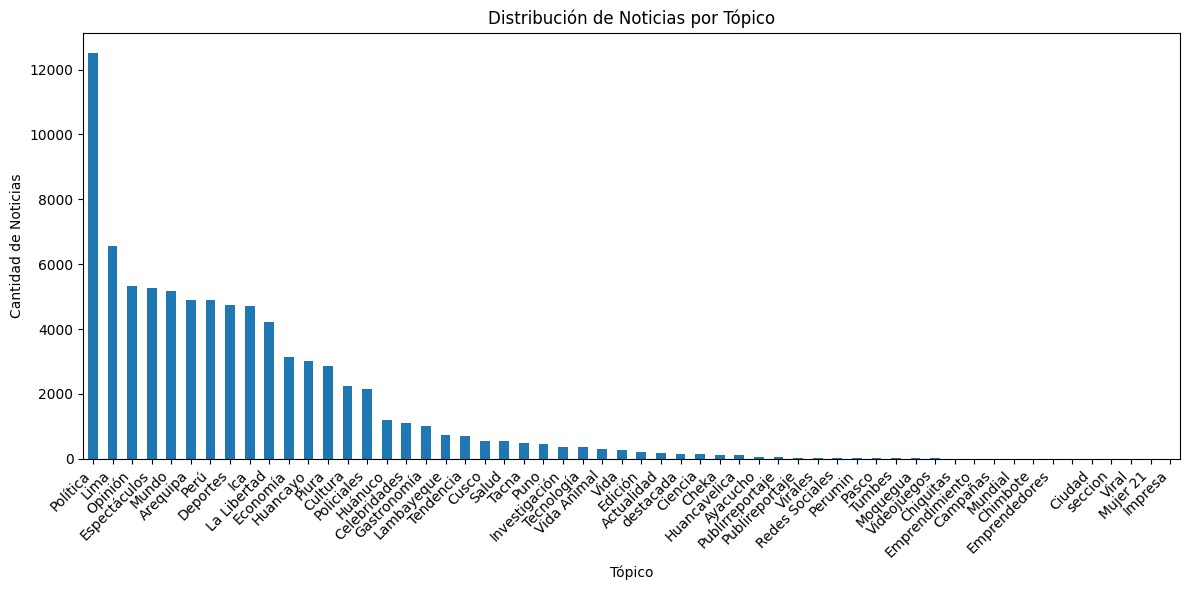

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
topicos.plot(kind='bar')
plt.title('Distribución de Noticias por Tópico')
plt.xlabel('Tópico')
plt.ylabel('Cantidad de Noticias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [131]:
departamentos_peru = [
    'Amazonas',     'Ancash',       'Apurimac',     'Arequipa',
    'Ayacucho',     'Cajamarca',    'Callao',       'Cusco',
    'Huancavelica', 'Huanuco',      'Ica',          'Junin',
    'La Libertad',  'Lambayeque',   'Lima',         'Loreto',
    'Madre de Dios','Moquegua',     'Pasco',        'Piura',
    'Puno',         'San Martin',   'Tacna',        'Tumbes',
    'Ucayali', 'Huancayo', 'Trujillo', 'Chiclayo', 'Iquitos',
    'Huánuco', 'Pucallpa', 'Chimbote'
]

In [132]:
def agrupar_regional(seccion):
    if seccion in departamentos_peru:
        return 'Regional'
    return seccion

In [133]:
df_agrupado = df.copy()
df_agrupado['seccion'] = df_agrupado['seccion'].apply(agrupar_regional)

In [134]:
topicos_agrupados = df_agrupado['seccion'].value_counts()
print(f"\nTotal de tópicos únicos: {df_agrupado['seccion'].nunique()}")


Total de tópicos únicos: 40


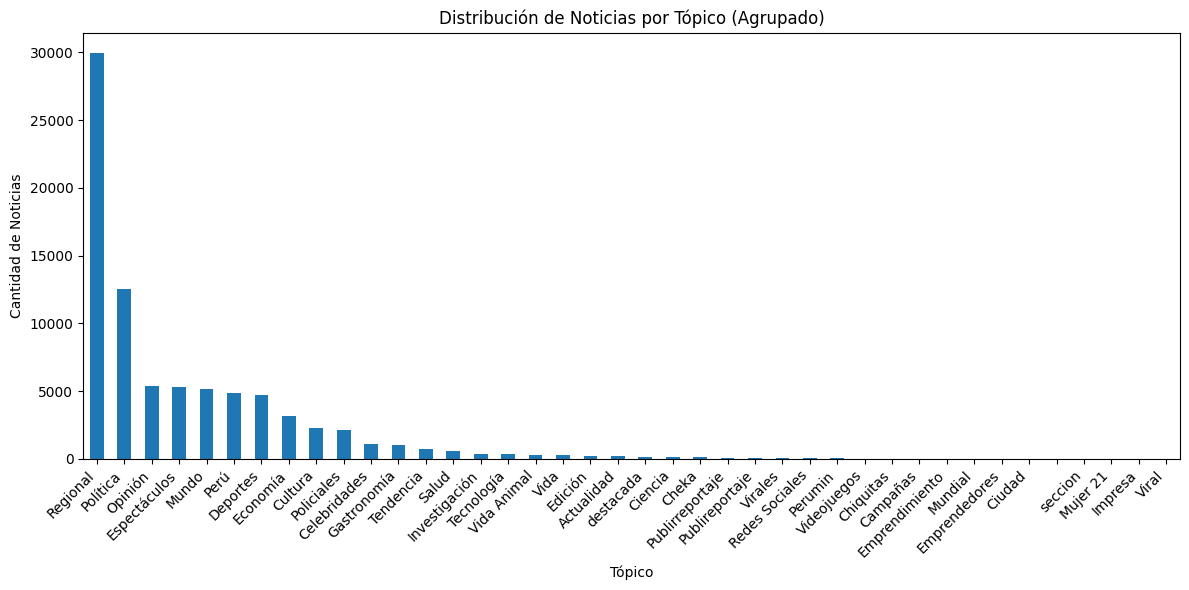

In [135]:
plt.figure(figsize=(12, 6))
topicos_agrupados.plot(kind='bar')
plt.title('Distribución de Noticias por Tópico (Agrupado)')
plt.xlabel('Tópico')
plt.ylabel('Cantidad de Noticias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [136]:
categorias_excluir = [
    'Ciudad', 'Viral', 'seccion', 'destacada', 'Chiquitas', 'Edición', 'Publireportaje', 'Regional', '', 
    'Tecnología', 'Perú', 'Tendencia', 'Edicion', 'Ciencia', 'Actualidad', 'Virales', 'Ciudad', 'Publirreportaje',
    'Campañas', 'Videojuegos', 'Redes Sociales', 'Mujer 21', 'Vida Animal',
    'Impresa', 'Cheka'
]

In [137]:
df_filtrado = df_agrupado[~df_agrupado['seccion'].isin(categorias_excluir)].copy()
print(f"Noticias después del filtro: {len(df_filtrado)}")

Noticias después del filtro: 43921


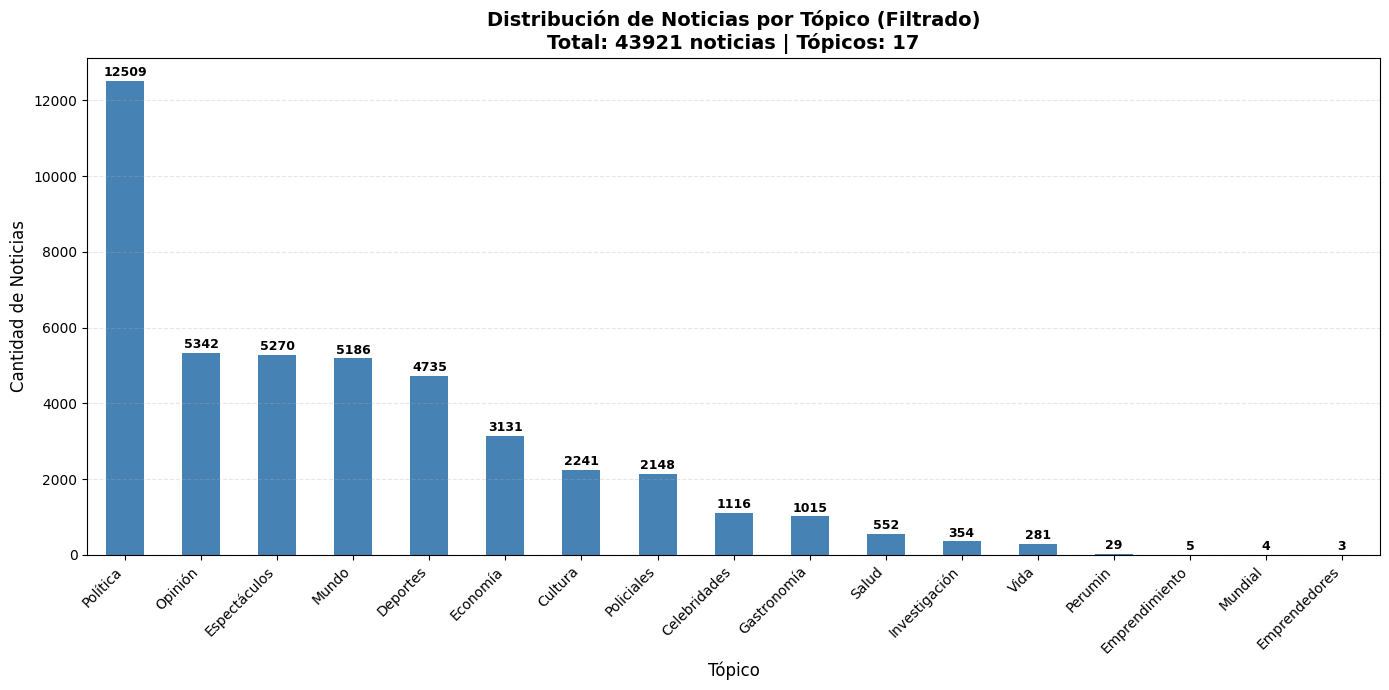

In [138]:
topicos_finales = df_filtrado['seccion'].value_counts()


fig, ax = plt.subplots(figsize=(14, 7))
bars = topicos_finales.plot(kind='bar', color='steelblue', ax=ax)


for i, v in enumerate(topicos_finales.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title(f'Distribución de Noticias por Tópico (Filtrado)\nTotal: {len(df_filtrado)} noticias | Tópicos: {len(topicos_finales)}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Tópico', fontsize=12)
plt.ylabel('Cantidad de Noticias', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

In [139]:
mapeo_categorias = {
    'Celebridades': 'Espectáculos',
    'Investigación': 'Policiales',
    'Gastronomía': 'Cultura',
    'Mundial': 'Deportes',
    'Emprendimiento': 'Economía',
    'Emprendedores': 'Economía',
    'Vida': 'Salud',
    'Perumin': 'Economía'
}

In [140]:
def unificar_categorias(seccion):
    return mapeo_categorias.get(seccion, seccion)


In [141]:
df_unificado = df_filtrado.copy()
df_unificado['seccion'] = df_unificado['seccion'].apply(unificar_categorias)

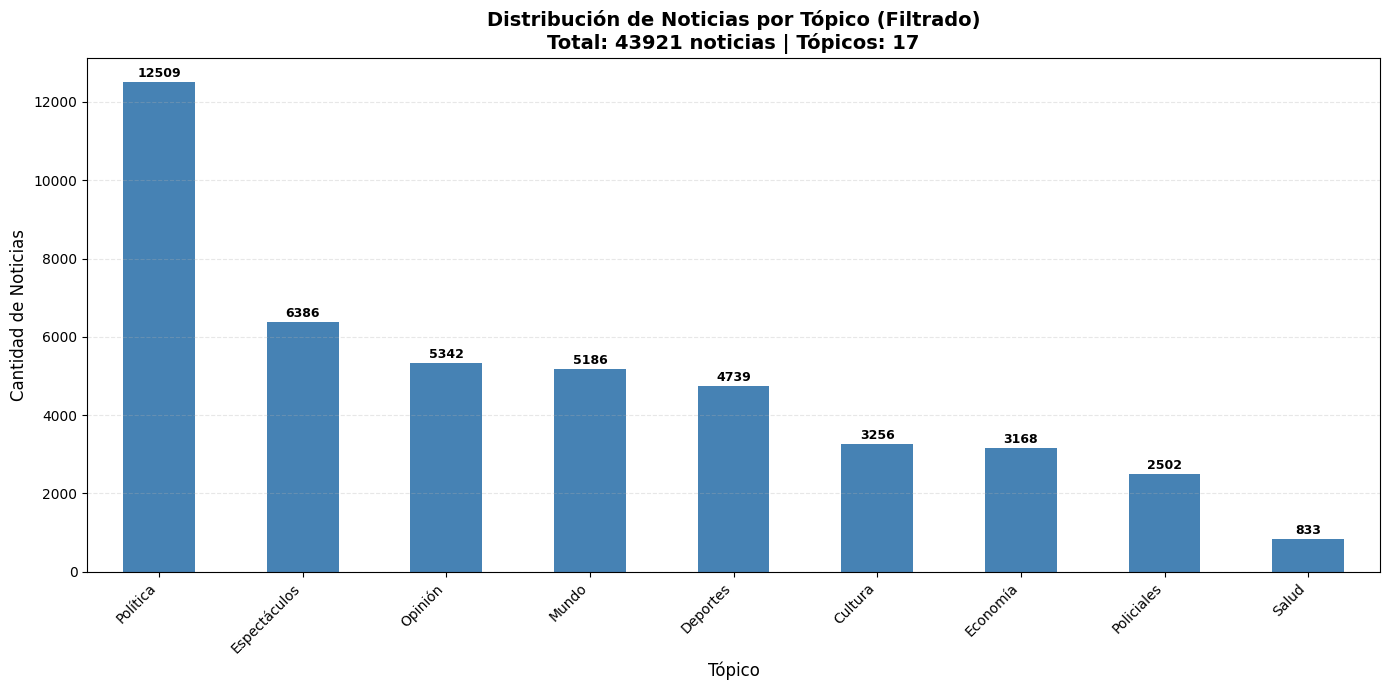

In [142]:
topicos_unificados = df_unificado['seccion'].value_counts()


fig, ax = plt.subplots(figsize=(14, 7))
bars = topicos_unificados.plot(kind='bar', color='steelblue', ax=ax)


for i, v in enumerate(topicos_unificados.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title(f'Distribución de Noticias por Tópico (Filtrado)\nTotal: {len(df_unificado)} noticias | Tópicos: {len(topicos_finales)}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Tópico', fontsize=12)
plt.ylabel('Cantidad de Noticias', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

In [143]:
df_unificado.to_csv(
    'noticias_unificadas.tsv',
    sep='\t',
    index=False,
    encoding='utf-8',
    header=True
)